# Dockless Scooter Bayesian Network

Loading bayesian network and data.

In [1]:
from dockless_model import DocklessBayesNet
from dockless_data import *
import pandas as pd

In [2]:
dl_model = DocklessBayesNet()
dl_model.load_data()

Loading Scooter Data ...


/Users/sanjayyepuri/.pyenv/versions/anaconda3-5.3.1/envs/OSMNX/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  


Scooter Data Loaded.
Loading Census Data ...
Census Data Loaded.
Loading Class Data ...
Cleaning Class Data ...
Finished Cleaning Class Data.
Cleaning Scooter Data ...
(1452803, 18) (1446243, 18)
(1327537, 18)


/Users/sanjayyepuri/Documents/Source/343h/traffic/notebooks/dockless_data.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  scooter_data['Start Time'] = start_time
/Users/sanjayyepuri/Documents/Source/343h/traffic/notebooks/dockless_data.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  scooter_data['End Time'] = end_time
/Users/sanjayyepuri/Documents/Source/343h/traffic/notebooks/dockless_data.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Finished Cleaning Scooter Data.
Transforming Endpoints ...
Finished Transforming Endpoints.


Precomputing conditional probabilities. This may take a while but allows us to sample from the model really fast. 

In [3]:
dl_model.compute_start_region_distribution()

Started Building EER
Completed Building EER
Started Building BUR
Completed Building BUR
Started Building UTC
Completed Building UTC
Started Building ECJ
Completed Building ECJ
Started Building CPE
Completed Building CPE
Started Building RLM
Completed Building RLM
Started Building MEZ
Completed Building MEZ
Started Building CBA
Completed Building CBA
Started Building GSB
Completed Building GSB
Started Building ART
Completed Building ART
Started Building ETC
Completed Building ETC
Started Building CMA
Completed Building CMA
Started Building RLP
Completed Building RLP
Started Building JGB
Completed Building JGB
Started Building PHR
Completed Building PHR
Started Building SZB
Completed Building SZB
Started Building WAG
Completed Building WAG
Started Building PAR
Completed Building PAR
Started Building PAI
Completed Building PAI
Started Building GDC
Completed Building GDC
Started Building FNT
Completed Building FNT
Started Building WMB
Completed Building WMB
Started Building GOL
Completed B

In [5]:
dl_data = dl_model.data

## Comparing Original Data's Distribution and the Modeled One's

We will sample 1000 rides for each possible class start time. The result will be 9000 representative start locations, start times, and distances each corresponding to a single scooter ride.

In [11]:
sampled_data = []
for i in range(8, 17):
    dl_model.compute_distance_distribution(i)
    sampled_data.extend(dl_model.gibbs_sample(1000, i))

0.621323823928833
0.01897534990310669
0.6901240348815918
0.019572114944458006
0.6497611999511719
0.017716397047042847
0.6542026996612549
0.019667559146881102
0.6483669281005859
0.017319122076034546
0.6439831256866455
0.016840551137924195
0.6999709606170654
0.019550785064697266
0.6480729579925537
0.019200865030288696
0.6505029201507568
0.018750744104385375


In [12]:
df = pd.DataFrame(sampled_data, columns=['class_time', 'start_time', 'building', 'distance', 'tract_start'])
sampled_freqs = df.groupby(['tract_start'])['tract_start'].agg('count').to_frame('count').reset_index()
total = float(sum(sampled_freqs['count']))
sampled_freqs['proportion'] = sampled_freqs['count'].apply(lambda x: x/total)

total_sampled = sum(sampled_freqs['count'])
sampled_freqs

,tract_start,count,proportion
0,000204,270,0.030000
1,000500,2201,0.244556
2,000603,3004,0.333778
3,000604,2952,0.328000
4,000700,573,0.063667


In [16]:
original_freqs = dl_data.transformed_endpoints.groupby(['tract_start'])['tract_start'].agg('count').to_frame('count').reset_index()
total = float(sum(original_freqs['count']))
original_freqs['proportion'] = original_freqs['count'].apply(lambda x: (x/total))
original_freqs['normalized'] = original_freqs['count'].apply(lambda x: (x/total)*total_sampled)
original_freqs

,tract_start,count,proportion,normalized
0,000204,7539,0.016721,150.487052
1,000500,40857,0.090617,815.552391
2,000603,190526,0.422569,3803.116600
3,000604,176612,0.391709,3525.377266
4,000700,35342,0.078385,705.466692


We run a Chi-Squared goodness of fit test to determine if our sample proportions match our expected proportions for each of the distributions.

In [24]:
from scipy.stats import chisquare

chisquare(sampled_freqs['proportion'], f_exp=original_freqs['proportion'])

Power_divergenceResult(statistic=0.3038368387446537, pvalue=0.9895651486637331)

## Plotting the Data onto a Map

In [17]:
%reload_ext autoreload
%autoreload 2
from simulator import *
import osmnx as ox
import matplotlib.pyplot as plt

In [18]:
sim = Simulator()
sim.get_graph()
#original_map = ox.graph_from_address(central_address, distance=1500, network_type='bike')

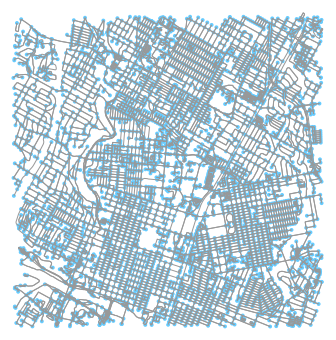

(<Figure size 493.396x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x179f9e8d0>)

In [19]:
ox.plot_graph(sim.map)

In [20]:
sim.simulate(sampled_data)

Finished SZB 000604
Finished SZB 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000603
Finished GSB 000603
Finished GSB 000603
Finished MEZ 000603
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished GSB 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished GSB 000604
Finished GSB 000604
Finished GSB 000604
Finished GSB 000604
Finished CPE 000604
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000700
Finished MEZ 000700
Finished MEZ 000700
Finished MEZ 000700
Finished MEZ 000700
Finished MEZ 000700
Finished CBA 000700
Finished CBA 000700
Finished CBA 000700
Finished MEZ 000700


Finished RLM 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished CBA 000500
Finished CBA 000500
Finished RLM 000500
Finished RLM 000604
Finished RLM 000604
Finished RLM 000500
Finished RLM 000603
Finished RLM 000500
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished SZB 000603
Finished SZB 000603
Finished SZB 000603
Finished CPE 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLP 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000604


Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000500
Finished CBA 000204
Finished CBA 000204
Finished CBA 000204
Finished CBA 000204
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000204
Finished RLM 000204
Finished RLM 000204
Finished CPE 000204
Finished CPE 000204
Finished CPE 000204
Finished CPE 000604
Finished CPE 000604
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished SZB 000603
Finished SZB 000604
Finished SZB 000604
Finished SZB 000604
Finished SZB 000604
Finished CPE 000604
Finished CBA 000604
Finished CBA 000604
Finished CPE 000604
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603


Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BTL 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished BTL 000604
Finished BTL 000604
Finished BTL 000700
Finished BTL 000604
Finished PAR 000604
Finished PAR 000603
Finished PAR 000603
Finished ETC 000603
Finished ETC 000603
Finished ETC 000603
Finished ETC 000603
Finished ETC 000603
Finished ECJ 000603
Finished ECJ 000204
Finished ECJ 000603
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished GDC 000603
Finished PAI 000603
Finished PAI 000603
Finished BTL 000603
Finished BTL 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished PAI 000604


Finished PAR 000603
Finished PAR 000603
Finished SUT 000603
Finished WMB 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000204
Finished UTC 000204
Finished UTC 000604
Finished BUR 000604
Finished BUR 000604
Finished PAI 000604
Finished PAI 000604
Finished PAI 000604
Finished BUR 000604
Finished WMB 000604
Finished WMB 000604
Finished WMB 000604
Finished UTC 000604
Finished UTC 000604
Finished UTC 000604
Finished UTC 000603
Finished UTC 000603
Finished UTC 000603
Finished UTC 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished CPE 000603
Finished CPE 000604
Finished CPE 000604
Finished CPE 000604
Finished WMB 000604
Finished WMB 000604
Finished WMB 000604
Finished WMB 000603
Finished WMB 000603
Finished WMB 000604
Finished WMB 000604
Finished WMB 000604


Finished RLM 000604
Finished RLM 000604
Finished PAR 000604
Finished PAR 000204
Finished PAR 000204
Finished PAR 000204
Finished PAR 000603
Finished PAR 000604
Finished RLP 000604
Finished RLP 000604
Finished RLP 000604
Finished RLP 000604
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000700
Finished RLP 000700
Finished RLP 000700
Finished RLP 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000603
Finished RLM 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished RLM 000603
Finished GDC 000603
Finished MRH 000603
Finished CBA 000603
Finished JGB 000603
Finished JGB 000603
Finished JGB 000603
Finished JGB 000603
Finished JGB 000603
Finished JGB 000603
Finished JGB 000500
Finished JGB 000500


Finished CPE 000603
Finished CPE 000603
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished GDC 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000700
Finished RLM 000700
Finished RLM 000700
Finished RLP 000700
Finished RLP 000700
Finished RLM 000700
Finished RLM 000603
Finished RLM 000500
Finished RLM 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000700
Finished MRH 000700
Finished MRH 000700
Finished MRH 000700
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500


Finished GOL 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000500
Finished RLM 000603
Finished RLP 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished MRH 000500
Finished MRH 000700
Finished MRH 000700
Finished MRH 000700
Finished MRH 000700
Finished MRH 000700
Finished MRH 000700
Finished MRH 000700
Finished MRH 000700
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished JGB 000500
Finished JGB 000500
Finished JGB 000500
Finished JGB 000604
Finished JGB 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished GOL 000604
Finished GOL 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLP 000604
Finished RLP 000604
Finished RLP 000603
Finished RLP 000603


Finished RLP 000603
Finished PAR 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished MRH 000603
Finished JGB 000603
Finished JGB 000603
Finished JGB 000603
Finished JGB 000604
Finished GSB 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished RLM 000604
Finished RLM 000604
Finished JGB 000604
Finished JGB 000603
Finished UTC 000603
Finished UTC 000603
Finished UTC 000603
Finished UTC 000603
Finished UTC 000603
Finished UTC 000603
Finished UTC 000604
Finished UTC 000604
Finished UTC 000604
Finished UTC 000604
Finished UTC 000500
Finished UTC 000500
Finished UTC 000500
Finished ETC 000500
Finished PAI 000500
Finished PAI 000500
Finished PAI 000604
Finished UTC 000604
Finished UTC 000500
Finished UTC 000604
Finished UTC 000603
Finished ART 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603


Finished DFA 000500
Finished DFA 000500
Finished DFA 000500
Finished DFA 000500
Finished DFA 000500
Finished DFA 000500
Finished ART 000500
Finished ETC 000500
Finished ETC 000500
Finished ETC 000500
Finished ETC 000500
Finished ETC 000500
Finished SEA 000500
Finished SEA 000604
Finished SEA 000604
Finished SEA 000604
Finished UTC 000604
Finished UTC 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000603
Finished PAR 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished PAR 000603
Finished PAR 000204
Finished CPE 000204
Finished RLM 000204
Finished RLM 000204
Finished RLM 000204
Finished RLM 000204
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished ECJ 000500
Finished ECJ 000500
Finished ECJ 000500
Finished ECJ 000603


Finished RLM 000604
Finished RLM 000604
Finished BUR 000604
Finished BUR 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished PAR 000603
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000500
Finished RLM 000500
Finished RLM 000603
Finished RLM 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000700
Finished CPE 000700
Finished CPE 000700
Finished CPE 000603
Finished CPE 000603
Finished CPE 000604
Finished CPE 000604
Finished RLM 000604
Finished CPE 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000603
Finished RLM 000603


Finished CBA 000604
Finished CBA 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished PAR 000604
Finished SEA 000604
Finished SEA 000604
Finished SEA 000604
Finished BUR 000604
Finished BUR 000604
Finished CPE 000604
Finished CPE 000604
Finished ART 000604
Finished ART 000604
Finished ART 000604
Finished ART 000500
Finished ART 000500
Finished ART 000500
Finished ART 000604
Finished ART 000603
Finished CPE 000603
Finished CPE 000603
Finished SEA 000603
Finished SEA 000603
Finished RLM 000603
Finished RLM 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603


Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished CPE 000500
Finished MEZ 000500
Finished MEZ 000500
Finished MEZ 000500
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished RLM 000604
Finished CPE 000604
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished MEZ 000603
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished ART 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000603
Finished BUR 000603
Finished BUR 000603
Finished BUR 000603


Finished RLM 000603
Finished PHR 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000604
Finished RLM 000604
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished ECJ 000500
Finished ECJ 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLP 000500
Finished RLM 000500
Finished RLM 000500
Finished PAR 000500
Finished PAR 000500
Finished PAR 000500
Finished PAR 000500
Finished PAR 000604
Finished RLP 000604
Finished WAG 000604
Finished WAG 000604
Finished WAG 000604
Finished WAG 000604
Finished WAG 000603
Finished SEA 000603
Finished SEA 000603
Finished SEA 000603
Finished SEA 000603
Finished SEA 000603
Finished SEA 000604
Finished SEA 000604
Finished SEA 000604


Finished WAG 000604
Finished PHR 000604
Finished PHR 000604
Finished PHR 000604
Finished PHR 000604
Finished PHR 000604
Finished PHR 000604
Finished PHR 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000604
Finished RLM 000603
Finished RLM 000603
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000500
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000603
Finished RLM 000700
Finished RLM 000700
Finished RLM 000700
Finished RLM 000700
Finished RLM 000700
Finished RLM 000700
Finished RLM 000700
Finished RLM 000700
Finished RLM 000603
Finished RLM 000603
Finished PAR 000603
Finished PAR 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603


Finished RLP 000604
Finished CPE 000604
Finished CPE 000604
Finished CPE 000604
Finished SZB 000604
Finished SZB 000604
Finished SZB 000604
Finished SZB 000604
Finished SZB 000604
Finished SZB 000604
Finished SZB 000604
Finished PAI 000604
Finished PAI 000604
Finished PAI 000604
Finished UTC 000604
Finished ETC 000604
Finished ETC 000604
Finished GDC 000604
Finished GDC 000604
Finished GDC 000604
Finished GDC 000604
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished PAR 000603
Finished PAR 000603
Finished BUR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000700
Finished WMB 000700
Finished UTC 000700
Finished UTC 000700
Finished UTC 000700
Finished PAR 000700
Finished CBA 000700
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000604
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603
Finished CBA 000603


Finished MRH 000500
Finished MRH 000500
Finished SZB 000500
Finished SZB 000500
Finished SZB 000500
Finished SZB 000500
Finished SZB 000500
Finished SZB 000500
Finished MRH 000500
Finished PAR 000500
Finished RLM 000500
Finished MRH 000500
Finished BUR 000500
Finished MRH 000500
Finished BUR 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished UTC 000500
Finished UTC 000500
Finished UTC 000500
Finished UTC 000500
Finished BUR 000500
Finished BUR 000603
Finished BUR 000603
Finished BUR 000603
Finished BUR 000603
Finished BUR 000603
Finished BUR 000603
Finished BUR 000603
Finished MRH 000603
Finished PHR 000603
Finished PHR 000603
Finished UTC 000603
Finished UTC 000603
Finished BUR 000603
Finished PAR 000603
Finished PAR 000603
Finished CPE 000603
Finished CPE 000700
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CBA 000603
Finished CBA 000603
Finished MRH 000603
Finished MRH 000603
Finished GDC 000603


Finished UTC 000604
Finished UTC 000604
Finished UTC 000604
Finished WAG 000604
Finished UTC 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished BUR 000604
Finished WAG 000604
Finished WAG 000604
Finished WAG 000604
Finished CBA 000604
Finished CBA 000604
Finished MEZ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished WAG 000603
Finished WAG 000603
Finished WAG 000603
Finished GDC 000603
Finished GDC 000700
Finished GDC 000204
Finished GDC 000204
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished RLP 000603
Finished RLP 000603
Finished ECJ 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished RLM 000603
Finished RLM 000603


Finished PHR 000604
Finished PHR 000604
Finished PHR 000604
Finished PHR 000603
Finished MEZ 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished WAG 000603
Finished WAG 000603
Finished CBA 000603
Finished WAG 000603
Finished WAG 000603
Finished MEZ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000603
Finished ECJ 000500
Finished GDC 000500
Finished GDC 000500
Finished GDC 000604
Finished GDC 000603
Finished GDC 000603
Finished GDC 000604
Finished GDC 000604
Finished GDC 000604
Finished GDC 000604
Finished JGB 000604
Finished JGB 000604
Finished JGB 000604
Finished MEZ 000604
Finished MEZ 000700
Finished RLM 000700
Finished RLM 000604
Finished RLM 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604
Finished ECJ 000604


Finished GDC 000604
Finished GDC 000604
Finished GDC 000604
Finished WAG 000604
Finished WAG 000604
Finished WAG 000603
Finished CBA 000603
Finished ECJ 000603
Finished ECJ 000603
Finished MEZ 000603
Finished PHR 000603
Finished PHR 000603
Finished PHR 000603
Finished PHR 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000603
Finished GDC 000604
Finished GDC 000604
Finished GDC 000604
Finished PHR 000604
Finished CBA 000604
Finished CBA 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000603
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604
Finished MEZ 000604


Finished CAL 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished GSB 000603
Finished GSB 000603
Finished GSB 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000604
Finished RLP 000604
Finished RLP 000604
Finished RLP 000604
Finished RLP 000604
Finished UTC 000604
Finished UTC 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603
Finished RLP 000603


Finished CPE 000603
Finished GSB 000603
Finished GSB 000603
Finished GSB 000603
Finished PAR 000603
Finished CPE 000603
Finished CPE 000500
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished CPE 000603
Finished UTC 000603
Finished UTC 000604
Finished UTC 000604
Finished UTC 000604
Finished UTC 000604
Finished RLP 000604
Finished UTC 000604
Finished UTC 000604
Finished UTC 000604
Finished UTC 000604
Finished PAR 000604
Finished PAR 000604
Finished CAL 000604
Finished CAL 000604
Finished PAR 000604
Finished PAR 000603
Finished PAR 000603
Finished PAR 000603
Finished PAR 000604
Finished PAR 000603
Finished CPE 000603
Finished CPE 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000603
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000500
Finished MRH 000204
Finished MRH 000204
Finished RLP 000204
Finished MRH 000204
Finished MRH 000204


In [21]:
for e in sim.map.edges:
    print(sim.map.edges[e]['count']) 

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
20
7
41
3
0
0
0
0
0
0
0
22
39
0
0
0
0
0
0
0
0
7
128
7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
3
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
354
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2179
194
0
0
0
583
237
0
0
1
0
0
23
0
6
0
13
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
35
0
0
0
0
0
3
0
0
0
0
0
0
0
14
69
0
0
0
0
2
0
3
0
0
0
0
0
0
5
31
75
1
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
742
0
0
5
1
736
0
4
0
0
2
726
0
0
0
7
0
3
0
0
0
6
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
47
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12
0
0
0
0
2
28
0
0
85
0
0
0
0
8
0
6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
40
0
0
241
0
0
0

0
0
0
0
0
3
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
44
25
78
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
8
0
8
0
0
0
0
0
5
0
0
4
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
13
0
0
0
0
0
0
0
0
0
123
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
101
0
0
0
0
0
0
0
0
0
0
0
0
0
18
44
0
0
0
18
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
22
727
0
0
27
0
58
0
0
28
0
0
0
112
0
0
913
42
913
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
83
0
0
0
0
1
2
0
3
0
0
1
1
0
0
0
0
0
0
2
0
1
0
0
0
1
0
21
0
0
11
0
0
7
0
0
0
0
0
0
0
0
0
0
0
165
0
48
0
0
0
17
0
2
0
37
0
8
20
0
5
10
0
0
2
4
0
0
8
3
0
319
2
0
289
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
10
24
181
23
0
5
23
0
647
0
23
0
0
0
141
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
1
0
0
1
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
2
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
35
0
0
1
8
1
0
0
0
0
0
0
46
0
0
47
0
0
68
19
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
1
0
7
0
0
1673
12
0
0
0
0
0
0
0
296
0
0
282
0
0
0
9
0
1824
55
23
0
347
283
0
0
72
0
0
0
0
0
0
0
343
765
0
0
0
1672
176
0
1647
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1374
0
2
0
1
1
0
1
0
0
10
0
0
0
0
8
0
0
0
0
0
0
0
12
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
3
0
0
0
0
17
0
0
0
44
2
0
0
0
0
3
0
4
0
0
0
0
0
0
157
0
0
0
0
0
0
0
0
0
0
1
0
3
0
0
0
0
0
0
0
0
0
0
0
0


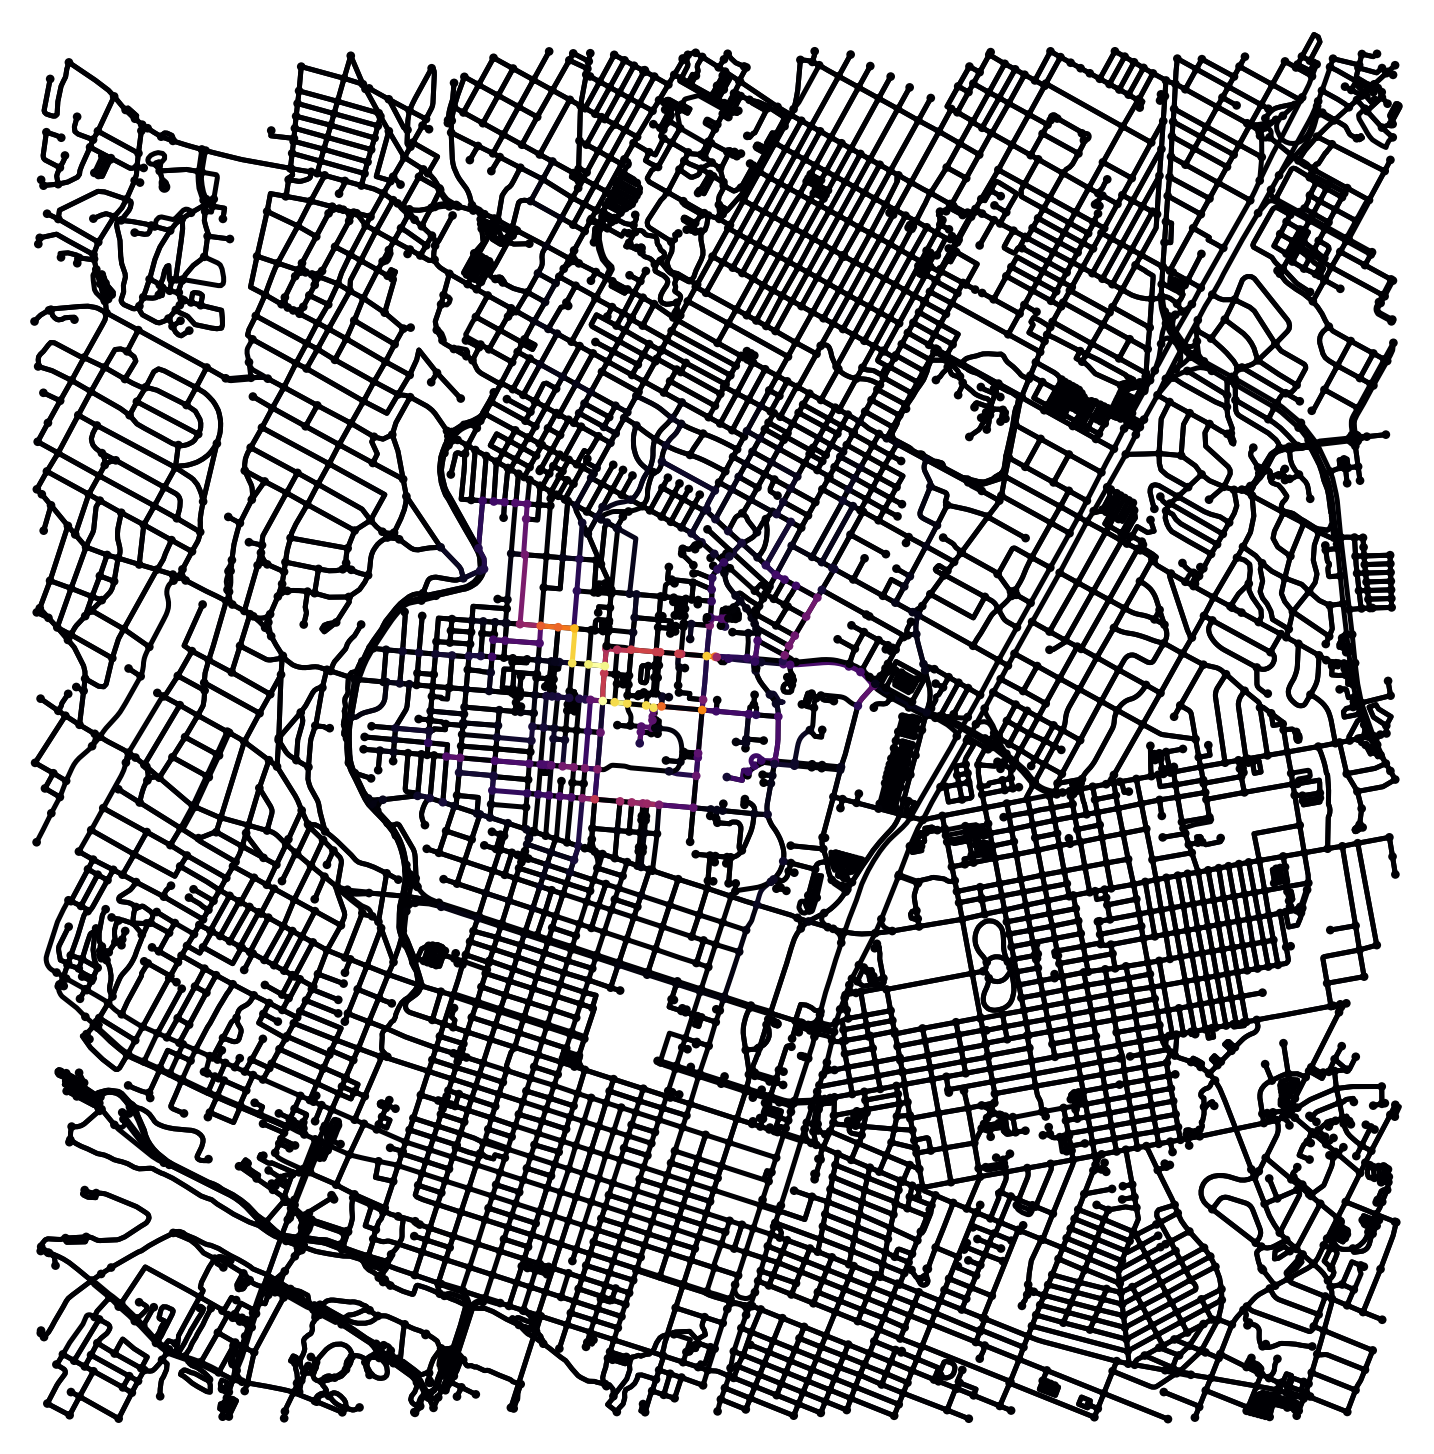

In [22]:
ec = ox.get_edge_colors_by_attr(sim.map, 'count', cmap='inferno', num_bins=100)
nc = ox.get_node_colors_by_attr(sim.map, 'count', cmap='inferno', num_bins=100)
fig, ax = ox.plot_graph(sim.map, fig_height=20, edge_color=ec, node_color=nc, node_size=75, node_zorder=3, edge_linewidth=5, dpi=1000, filename="sanjaybig.svg", file_format='svg', save=True)

# fig.colorbar(fig, cax=make_axes_locatable(ax), orientation='vertical')

